<a href="https://colab.research.google.com/github/brunogomesmkt/Sistema-de-Classificacao-de-Risco-para-Concessao-de-Emprestimo/blob/main/Sistema_Classifica%C3%A7%C3%A3o_Risco_by_Bruno_Gomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sistema de Classificação de Risco para Concessão de Empréstimo**



**Análise Exploratória dos Dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [ ]:
dataset = pd.read_csv('/content/risco.csv')

In [ ]:
dataset.head(4)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.shape

(150, 6)

In [ ]:
print(f'O Dataset tem {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.')

O Dataset tem 150 linhas e 6 colunas.


**TABELA DE FREQUÊNCIA DE VARIÁVEL "RISCO"**

In [ ]:
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset['Risco'].value_counts()

Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

**OUTRA FORMA DE CRIAR TABELA DE FRQUÊNCIA**

In [ ]:
dataset.Risco.value_counts()

Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

CRIAR UM GRÁFICO DE BARRAS DA VARIAVEL TARGET

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


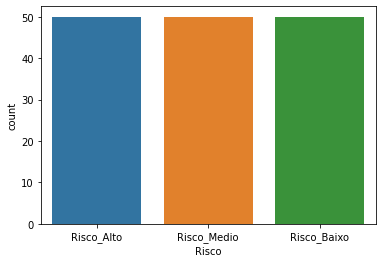

In [ ]:
sns.countplot(dataset['Risco'])

**VERIFICAR SE TEM VALORES AUSENTES CHECK FOR MISSING VALUES**

In [ ]:
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

**ELIMINAR COLUNAS SEM UTILIDADE**

In [ ]:
dataset = dataset.drop(columns='id_cliente')

In [ ]:
dataset

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


**GRÁFICO TIPO BOZX AND WHISKER (BOXPLOT)**

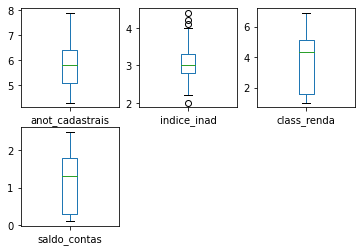

In [ ]:
from matplotlib import pyplot
dataset.plot(kind='box', subplots=True, layout= (2,3), sharex= False, sharey= False)
pyplot.show()

**GRÁFICO DE HISTOHRAMA**

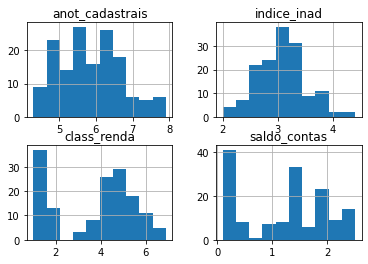

In [ ]:
dataset.hist()
plt.show()

**GRÁFICO DE DISPERSÃO (SCATTER)**

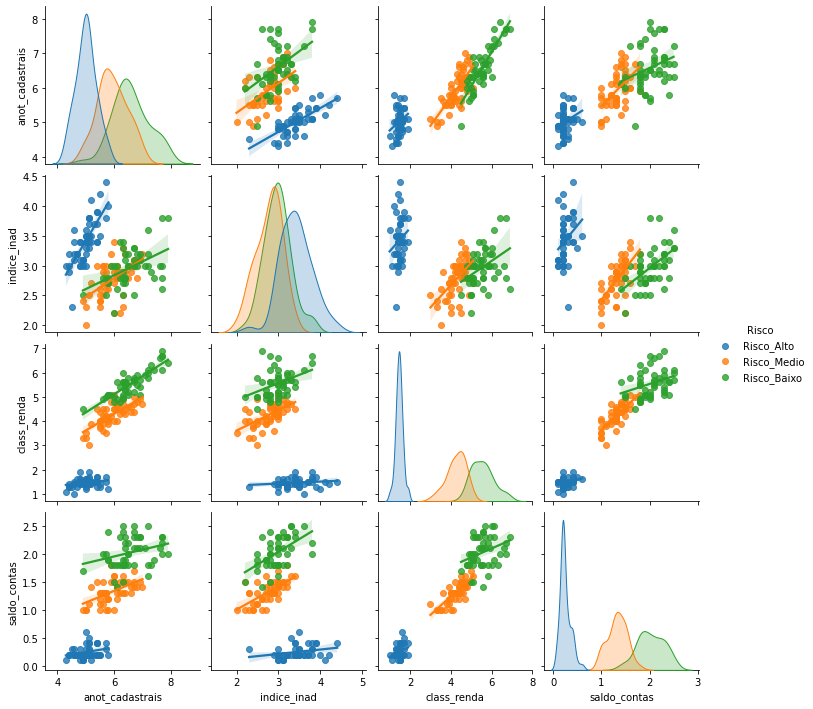

In [ ]:
sns.pairplot(dataset, hue='Risco', kind="reg")

**GRÁFICO DE DISPERSÃO sem agregar pelo TARGET**

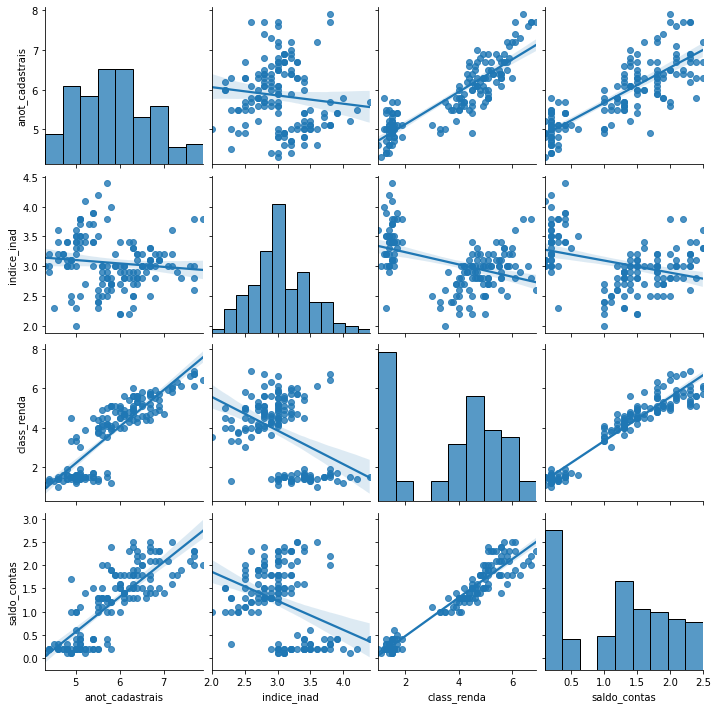

In [ ]:
sns.pairplot(dataset, kind= "reg")

**PROCESSAMENTO DE DADOS**

Separando as variáveis de entrada e saída do modelo:

Variáveis Independentes

In [ ]:
X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values

In [ ]:
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", Y[:3])


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variável a ser Predita :

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
Y

array(['Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_M

**Separando os dados entre Treino e Teste**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 7) 

In [ ]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("Y = \n", Y_train[:2])

print("Dados de Teste :\n---------------------\n")
print("X = \n", X_test[:2])
print("Y = \n", Y_test[:2])

Dados de Treino :
----------------

X = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
Y = 
 ['Risco_Baixo' 'Risco_Medio']
Dados de Teste :
---------------------

X = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
Y = 
 ['Risco_Baixo' 'Risco_Medio']


In [ ]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


Padronizando as Features - As variáveis explicativas (variáveis de entrada)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


**CONSTRUINDO UMA MÁQUINA PREDITIVA**

Versão da Máquina Preditiva: Criando um baseline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30)

Treinando a Máquina preditiva com os dados de treino

In [ ]:
Maquina_Preditiva = Maquina_Preditiva.fit(X_train, Y_train)

Fazendo novas Previsões com os dados de teste

In [ ]:
Y_pred = Maquina_Preditiva.predict(X_test)

In [ ]:
print('\n---------------------------\n')
print('Valores reais com dados teste :\n', Y_test)

print('\n---------------------------\n')
print('Valores preditos com a Maquina Preditiva com dados teste :\n', Y_pred)


---------------------------

Valores reais com dados teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores preditos com a Maquina Preditiva com dados teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 

In [ ]:
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>

**AVALIANDO A MÁQUINA PREDITIVA**

Calculando a Acurácia:

In [ ]:
from sklearn import metrics

In [ ]:
print('Acurácia da Máquina =', metrics.accuracy_score(Y_test, Y_pred)*100)

Acurácia da Máquina = 80.0


Comparando Real e Predito com dados de Teste

In [ ]:
print('\nReal vs Predito \n-----------\n')
error_df = pd.DataFrame({'Real': Y_test,
                         'Predito': Y_pred})

error_df.head(5)


Real vs Predito 
-----------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print('Acurácia da Máquina =', metrics.accuracy_score(Y_test, Y_pred)*100)
cm = confusion_matrix(Y_test,Y_pred)
cr = classification_report(Y_test, Y_pred)
print(cm)
print(cr)

Acurácia da Máquina = 80.0
[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



## **2° Versão da Máquina Preditiva: Máquina Definitiva**

Importando a bilblioteca do SVM - Support Vector Machines


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',            
                 gamma= 1e-5  ,              
                 C=10,                       
                 random_state=7)

Treinando a Máquina com o SVC

In [ ]:
classifier.fit(X_train, Y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

Fazendo novas previsões com os dados de teste

In [ ]:
Y_pred= classifier.predict(X_test)

In [ ]:
print("\n---------------------------\n")
print("Predicted Values for Test Set :\n", Y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n", Y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva

In [ ]:
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

Calculando a Acurácia da Máquina Preditiva


In [ ]:
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(Y_test, Y_pred))

Prediction Accuracy =  0.9333333333333333


Comparando valores Reais com Preditos pela Máquina

In [ ]:
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : Y_test,
                         "Predicted" : Y_pred})

error_df.head(5)


Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


Usando a confusion matrix e o classification report para avaliar a Máquina

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

Imprimindo a Confusion Matrix e o Classification Report

In [ ]:
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

